In [62]:
# import libraries
from os import makedirs
from os import listdir
from random import seed
from random import random
from shutil import copyfile
import skimage
import random as rdm
import cv2

# import libraries
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [4]:
# create directories
dataset_home = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dataaug_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [59]:
main_path = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dataaug_dogs_vs_cats/train/'
labeldirs = ['dogs/', 'cats/']
for labldir in labeldirs:
    idx = 12501
    # input a random gaussian noice in the image
    for file in listdir(main_path + labldir)[:1000]:
        img_path = main_path + labldir + file
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)/255.0
        gimg = skimage.util.random_noise(img, mode="gaussian")
        file_name = main_path + labldir + labldir.replace("/", "").replace("s", ".") + str(idx) + '.jpg'
        img = cv2.convertScaleAbs(gimg, alpha=(255.0))
        cv2.imwrite(file_name, img)
        idx += 1

    # creating random rectangles blocks into the image
    for file in listdir(main_path + labldir)[1500:3500]:
        img_path = main_path + labldir + file
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)/255.0

        r1 = rdm.randrange(int((img.shape[0]/2))-100,img.shape[0],1)
        r2 = rdm.randrange(int((img.shape[0]/2))-100,img.shape[0],1)
        r3 = rdm.randrange(0,int((img.shape[1]/2)),1)
        r4 = rdm.randrange(0,int((img.shape[1]/2)),1)

        n1_img = cv2.rectangle(img, (r1, r2), (r3, r4), (0,0,0), -1)
        file_name = main_path + labldir + labldir.replace("/", "").replace("s", ".") + str(idx) + '.jpg'
        img = cv2.convertScaleAbs(n1_img, alpha=(255.0))
        #plt.imshow(img)
        cv2.imwrite(file_name, img)
        idx += 1

VGG1

In [60]:
train_path = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dataaug_dogs_vs_cats/train/'
test_path = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dataaug_dogs_vs_cats/test/'

Found 24700 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
> 72.460


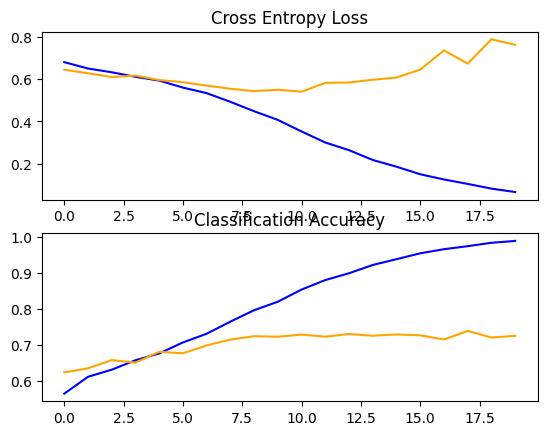

In [63]:
# define cnn model (VGG1)
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory(train_path,
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

VGG2

Found 24700 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
> 76.921


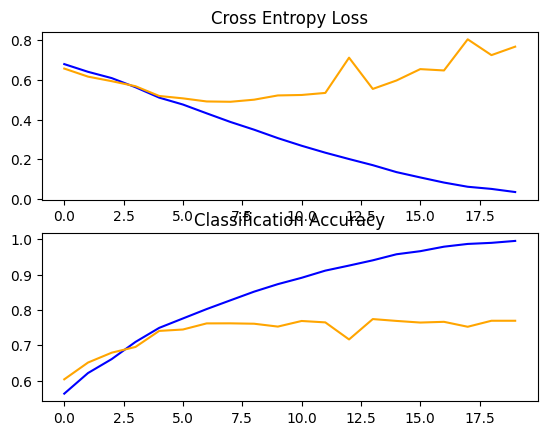

In [64]:
# define cnn model (VGG2)
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory(train_path,
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

VGG 3

Found 24700 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
> 80.381


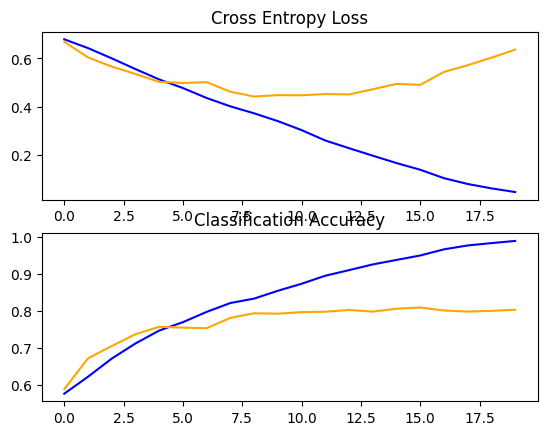

In [65]:
# define cnn model (VGG3)
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory(train_path,
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Dropout Regularization

Found 24700 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
> 83.016


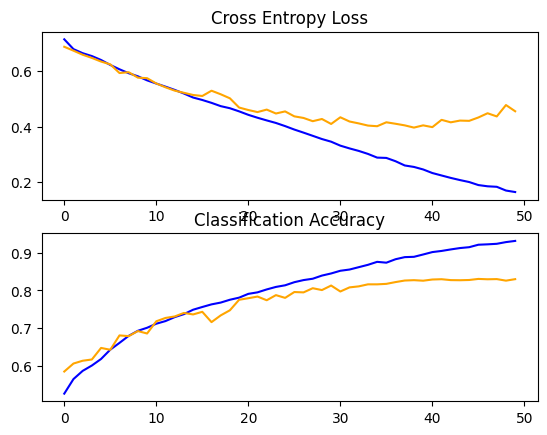

In [66]:
# baseline model with dropout for the dogs vs cats dataset

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterator
	train_it = datagen.flow_from_directory(train_path,
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Image Data Augmentation

Found 24700 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
> 87.222


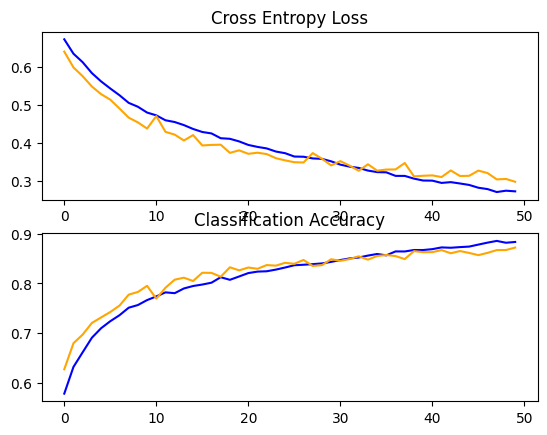

In [67]:
# baseline model with data augmentation for the dogs vs cats dataset

# define cnn model (VGG3)
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory(train_path,
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory(test_path,
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Explore Transfer Learning

Found 24700 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Epoch 1/10
386/386 [==============================] - 3383s 9s/step - loss: 0.2058 - accuracy: 0.9564 - val_loss: 0.0786 - val_accuracy: 0.9767
Epoch 2/10
386/386 [==============================] - 3322s 9s/step - loss: 0.0343 - accuracy: 0.9875 - val_loss: 0.0863 - val_accuracy: 0.9741
Epoch 3/10
386/386 [==============================] - 3306s 9s/step - loss: 0.0089 - accuracy: 0.9983 - val_loss: 0.1095 - val_accuracy: 0.9775
Epoch 4/10
386/386 [==============================] - 3282s 9s/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.1260 - val_accuracy: 0.9771
Epoch 5/10
386/386 [==============================] - 3306s 9s/step - loss: 9.2449e-04 - accuracy: 0.9999 - val_loss: 0.1334 - val_accuracy: 0.9778
Epoch 6/10
386/386 [==============================] - 3404s 9s/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1384 - val_accuracy: 0.9776
Epoch 7/10
386/386 [===========================

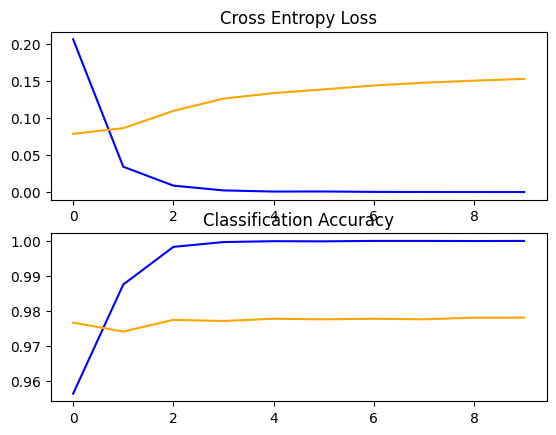

In [68]:
# vgg16 model used for transfer learning on the dogs and cats dataset

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory(train_path,
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()